# Importing Dependencies 

In [2]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Reading the input data using Pandas 

In [14]:
df=pd.read_csv('ECG_data.csv')
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493366,-0.783134,1.0


# Feature and target variable seperation


In [15]:
X=df.iloc[:,0:-1].values
X.shape

(4997, 140)

In [16]:
Y=df.iloc[:,-1:].values
Y.shape

(4997, 1)

# Visualisation of data 

In [17]:
def plot(X,y,num_plots) :
    l = np.random.randint(0,X.shape[0],size=(num_plots//2,2))
    fig,axs = plt.subplots(num_plots//2,2,figsize=(20,20))

    for i in range(num_plots//2) :
        for j in range(2) :
            axs[i,j].plot(X[l[i,j]])
            if y[l[i,j]][0] == 0 :
                label0 = 'Abnormal'
            else :
                label0 = 'Normal'
            text =  'Actual : ' + label0
            axs[i,j].set_title(text)

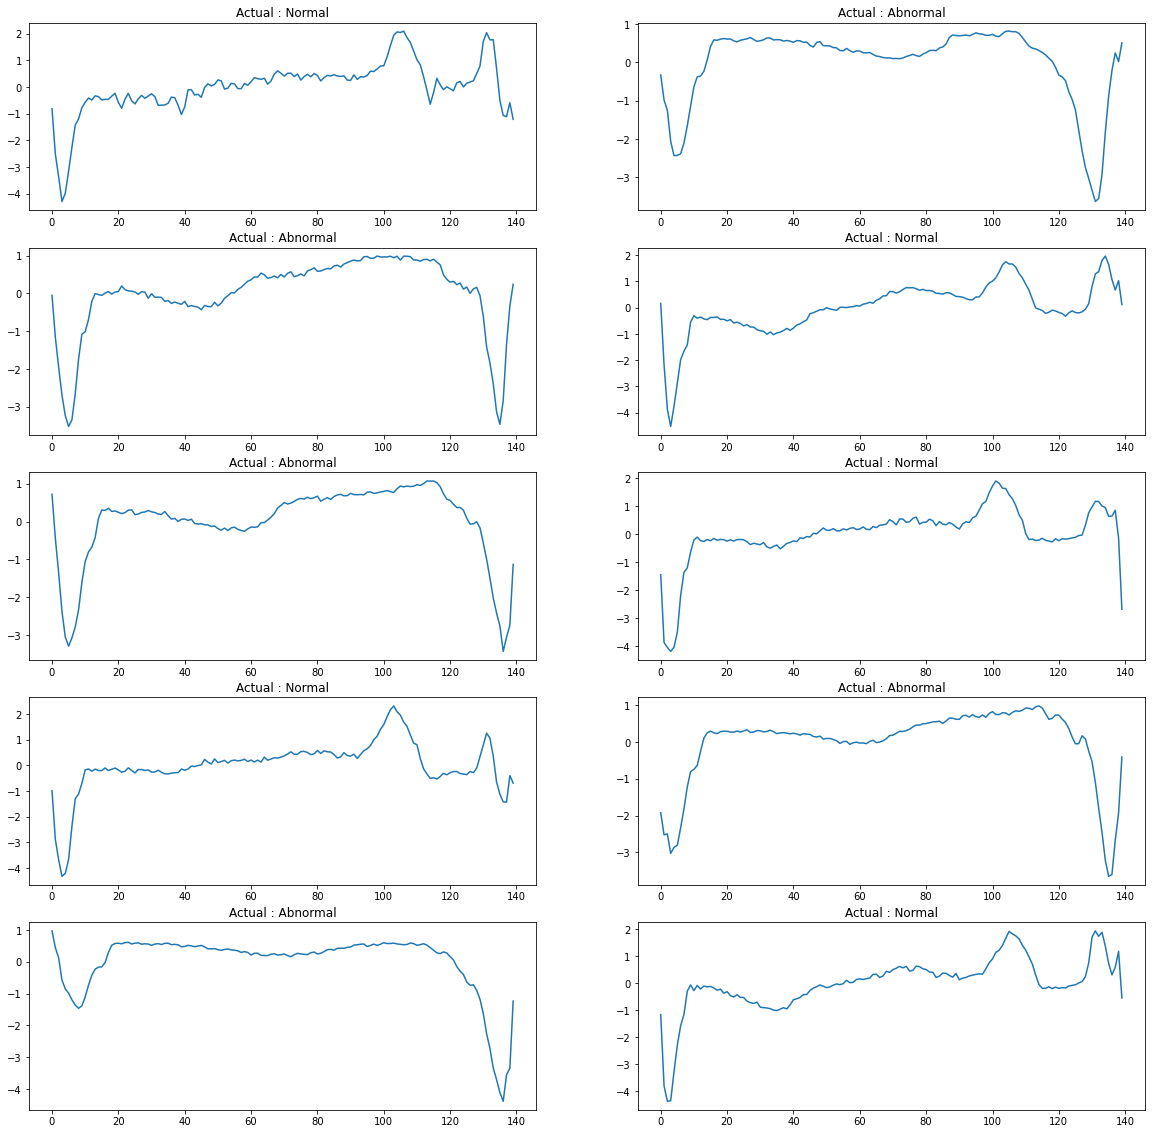

In [18]:
plot(X,Y,10)

# TEST TRAIN SPLIT

In [19]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,shuffle=True)

# ECG MODEL

In [20]:
def ECG_model():
  model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(140,)),
        tf.keras.layers.Lambda(lambda x : tf.expand_dims(x,axis=-1)),
        tf.keras.layers.LSTM(64,return_sequences=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
  model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [21]:
ECG=ECG_model()
ECG.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 140, 1)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 140, 64)           16896     
_________________________________________________________________
flatten (Flatten)            (None, 8960)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1147008   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,180,545
Trainable params: 1,180,545
Non-trainable params: 0
______________________________________________

In [ ]:
joblib.dump(cnn,"C:/Users/user/Downloads/cnn.pkl")

# Model Fitting

In [22]:
ECG.fit(X_train,Y_train,epochs=100,validation_split=.10,shuffle=True,batch_size=15)

Epoch 1/100
240/240 [==============================] - 15s 50ms/step - loss: 0.2095 - accuracy: 0.9367 - val_loss: 0.0304 - val_accuracy: 0.9925
Epoch 2/100
240/240 [==============================] - 12s 50ms/step - loss: 0.0426 - accuracy: 0.9845 - val_loss: 0.0207 - val_accuracy: 0.9975
Epoch 3/100
240/240 [==============================] - 12s 49ms/step - loss: 0.0377 - accuracy: 0.9885 - val_loss: 0.0143 - val_accuracy: 0.9975
Epoch 4/100
240/240 [==============================] - 12s 51ms/step - loss: 0.0278 - accuracy: 0.9888 - val_loss: 0.0118 - val_accuracy: 0.9975
Epoch 5/100
240/240 [==============================] - 12s 50ms/step - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.0161 - val_accuracy: 0.9975
Epoch 6/100
240/240 [==============================] - 12s 50ms/step - loss: 0.0203 - accuracy: 0.9927 - val_loss: 0.0153 - val_accuracy: 0.9975
Epoch 7/100
240/240 [==============================] - 12s 49ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0095 - val_ac

In [26]:
ECG.evaluate(X_test,Y_test)

32/32 [==============================] - 1s 17ms/step - loss: 0.1192 - accuracy: 0.9910


[0.11915555596351624, 0.9909999966621399]


# Prediction on test data

In [27]:
def plot_pre_(X,y,pred,num_plots) :
    l = np.random.randint(0,X.shape[0],size=(num_plots//2,2))
    fig,axs = plt.subplots(num_plots//2,2,figsize=(20,20))

    for i in range(num_plots//2) :
        for j in range(2) :
            axs[i,j].plot(X[l[i,j]])
            if y[l[i,j]][0] == 0 :
                label0 = 'Abnormal'
            else :
                label0 = 'Normal'
            if np.round(pred[l[i,j]][0]) == 0 :
                label1 = 'Abnormal'
            else :
                label1 = 'Normal'
            text = 'Predicted : ' + label1 + 'Actual : ' + label0
            axs[i,j].set_title(text)

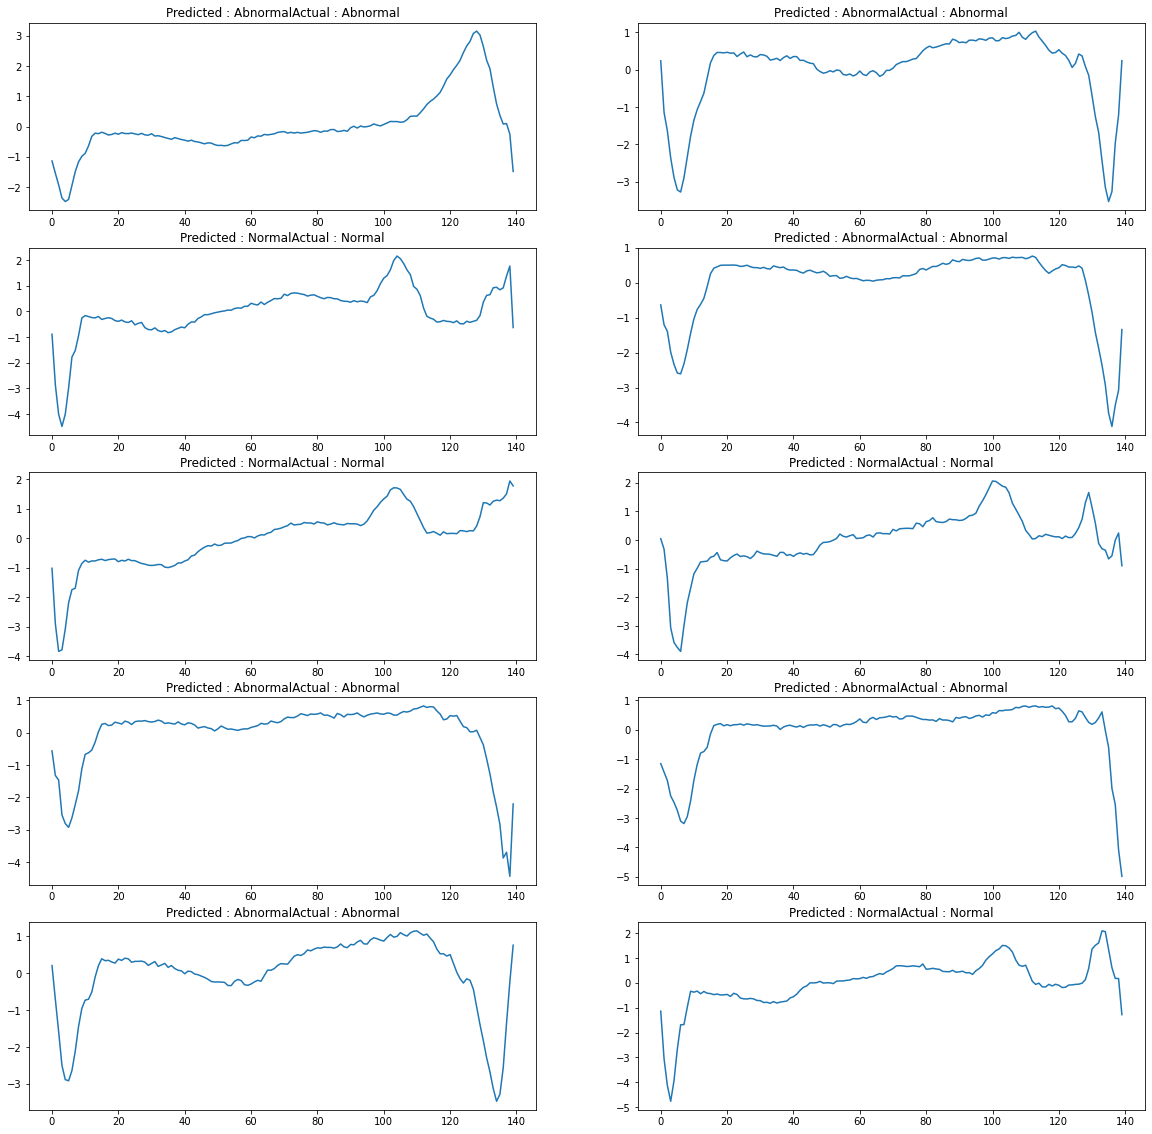

In [28]:
pred = ECG.predict(X_test)
plot_pre_(X_test,Y_test,pred,10)

In [29]:
Xnew =np.array([[-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,-0.36380791,-0.49195659,-0.42185509,-0.30920086,-0.4959387,-0.34211867,-0.35533627,-0.36791303,-0.31650279,-0.41237405,-0.47167181,-0.41345783,-0.36461703,-0.44929829,-0.47141866,-0.42477658,-0.46251673,-0.55247236,-0.47537519,-0.6942,-0.7018681,-0.59381178,-0.66068415,-0.71383066,-0.76980688,-0.67228161,-0.65367605,-0.63940562,-0.55930228,-0.59167032,-0.49322332,-0.46305183,-0.30164382,-0.23273401,-0.12505488,-0.15394314,-0.024357404,-0.065608758,0.034999258,0.061935219,0.07119542,0.12392505,0.10312371,0.22522849,0.12868305,0.30248315,0.25727621,0.19635161,0.17938297,0.24472863,0.34121687,0.32820441,0.40604169,0.44660507,0.42406823,0.48151204,0.4778438,0.62408259,0.57458456,0.59801319,0.5645919,0.607979,0.62063457,0.65625291,0.68474806,0.69427284,0.66558377,0.57579577,0.63813479,0.61491695,0.56908343,0.46857572,0.44281777,0.46827436,0.43249295,0.40795792,0.41862256,0.36253075,0.41095901,0.47166633,0.37216676,0.33787543,0.22140511,0.27399747,0.29866408,0.26356357,0.34256352,0.41950529,0.58660736,0.86062387,1.1733446,1.2581791,1.4337887,1.7005334,1.9990431,2.1253411,1.9932907,1.9322463,1.7974367,1.5222839,1.2511679,0.99873034,0.48372242,0.023132292,-0.19491383,-0.22091729,-0.24373668,-0.25469462,-0.29113555,-0.25649034,-0.22787425,-0.32242276,-0.28928586,-0.31816951,-0.36365359,-0.39345584,-0.26641886,-0.25682316,-0.28869399,-0.16233755,0.16034772,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742]])
X1=np.array([[-1.1336738,-2.7029409,-3.1209789,-3.5586694,-3.3124416,-2.607641,-1.3549388,-1.0147399,-0.79602313,-0.25959898,-0.27694155,-0.18357947,-0.12785821,-0.091802192,-0.074920139,-0.0091175241,-0.1907688,-0.11726901,-0.1305103,-0.058913343,-0.13438908,-0.1887616,-0.192885,-0.14522783,-0.1254537,-0.15222223,-0.11987196,-0.13058233,-0.15574176,-0.22086934,-0.24989136,-0.22299754,-0.32686827,-0.17850109,-0.2217034,-0.28263707,-0.21873626,0.066940365,0.074044951,-0.12070293,-0.1167576,0.032016927,0.096814024,0.15004541,0.26422729,0.23598472,0.17724474,0.20460624,0.31178672,0.16791014,-0.060435517,0.071160934,0.20089622,0.16644057,0.13149528,0.12327614,0.14270772,0.18343621,0.14160832,0.18768813,0.26148937,0.39111756,0.46418734,0.43656408,0.23675482,0.17483396,0.45781099,0.47938017,0.49650216,0.59066494,0.74158209,0.54003905,0.4294585,0.59529774,0.62318763,0.69752822,0.65027144,0.46506,0.51696076,0.53260332,0.54552675,0.5012098,0.55365921,0.49265974,0.47217245,0.62873368,0.8405418,0.76686649,0.66490672,0.97877782,1.0824595,1.1920401,1.4426878,1.7771882,1.7222756,1.7867348,1.7049863,1.5750277,1.5573201,1.0148192,0.62234283,0.30856207,0.11779155,0.097138005,-0.04047311,0.0051216153,0.059247075,0.0059122763,-0.031601807,-0.2529921,-0.14175408,-0.1263538,-0.12835101,-0.1102954,-0.06714659,-0.036743652,0.027356437,0.33305775,0.8281411,1.1565626,1.1294138,1.3127033,1.1948303,0.91591155,0.4254236,0.32809539,0.76528871,0.22702754,-1.1297598,-2.1504544,-2.8863395,-3.2069422,-2.941677,-2.5571397,-1.4879458,-1.1188798,-0.73711285,-0.1108401,0.0018580663,-0.12263937]])

ynew=ECG.predict(Xnew)

print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[-0.11252183 -2.8272038  -3.7738969  -4.3497511  -4.376041   -3.4749863
 -2.1814082  -1.8182865  -1.2505219  -0.47749208 -0.36380791 -0.49195659
 -0.42185509 -0.30920086 -0.4959387  -0.34211867 -0.35533627 -0.36791303
 -0.31650279 -0.41237405 -0.47167181 -0.41345783 -0.36461703 -0.44929829
 -0.47141866 -0.42477658 -0.46251673 -0.55247236 -0.47537519 -0.6942
 -0.7018681  -0.59381178 -0.66068415 -0.71383066 -0.76980688 -0.67228161
 -0.65367605 -0.63940562 -0.55930228 -0.59167032 -0.49322332 -0.46305183
 -0.30164382 -0.23273401 -0.12505488 -0.15394314 -0.0243574  -0.06560876
  0.03499926  0.06193522  0.07119542  0.12392505  0.10312371  0.22522849
  0.12868305  0.30248315  0.25727621  0.19635161  0.17938297  0.24472863
  0.34121687  0.32820441  0.40604169  0.44660507  0.42406823  0.48151204
  0.4778438   0.62408259  0.57458456  0.59801319  0.5645919   0.607979
  0.62063457  0.65625291  0.68474806  0.69427284  0.66558377  0.57579577
  0.63813479  0.61491695  0.56908343  0.46857572  0.4428

In [3]:
import joblib
joblib.dump(ECG,r'C:\Users\harsh\Downloads\ECG_ANAMOLY\ECG_Model.pkl')

NameError: name 'ECG' is not defined